In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Loading the data from Google drive
drinking = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/D2_train.csv')
eating = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/E1_train.csv')
walking = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/W3_train.csv')
grooming = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/G8_train.csv')
idle = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/I9_train.csv')
lying = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/L5_train.csv')
ruminating_lying = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/RL7_train.csv')
ruminating_standing = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/RS6_train.csv')
standing = pd.read_csv('/content/drive/MyDrive/Classify cow positions using Machine Learning/S4_train.csv')

In [4]:
#Concatening all the csv files
df = pd.concat([drinking,eating,walking,grooming,idle,lying,ruminating_lying,ruminating_standing,standing])

In [5]:
#viewing the top 5 rows of concatenated dataset
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0,2
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0,2
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5,2
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5,2
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5,2


In [ ]:
#Checking the dimensions of the data
df.shape

(12263524, 11)

In [ ]:
#Checking for null values
df.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

We notice that there are no null values present in our df

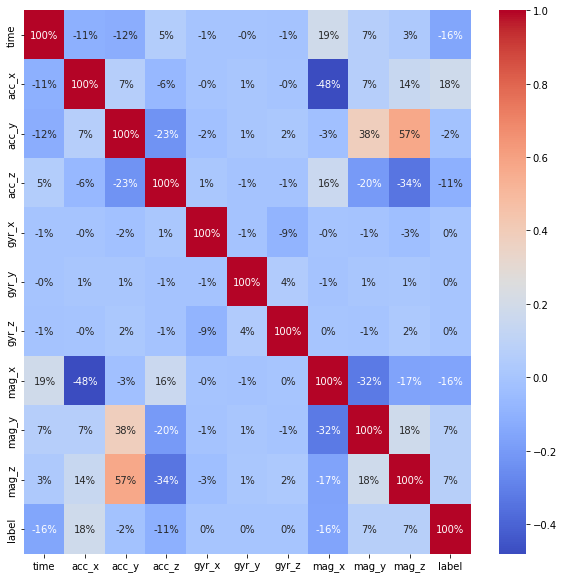

In [ ]:
#checking the correlation between all the features by heatmap
plt.figure(figsize = (10,10))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = "coolwarm", fmt = '.0%')
plt.show()


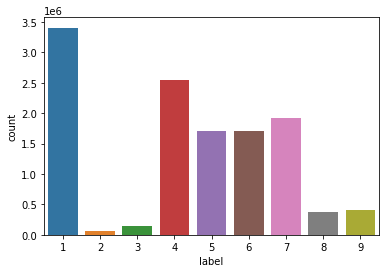

In [ ]:
#understanding our target variable
sns.countplot(df['label'])

In [ ]:
#checking if there are any categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 2539805
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 GB


In [ ]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,12263524.0,1.628243e+09,120566.211087,1.628067e+09,1.628106e+09,1.628312e+09,1.628335e+09,1.628421e+09
acc_x,12263524.0,-2.807402e-02,0.262217,-1.599756e+01,-2.182617e-01,-2.490230e-02,1.616211e-01,1.051514e+01
acc_y,12263524.0,6.211683e-01,0.708480,-1.314160e+01,8.281250e-01,9.370118e-01,9.736329e-01,1.182617e+01
acc_z,12263524.0,1.081455e-01,0.188861,-1.599121e+01,3.173830e-02,1.230469e-01,2.006836e-01,1.599854e+01
gyr_x,12263524.0,8.722215e-01,12.824807,-1.999756e+03,-2.014160e+00,8.544922e-01,3.723145e+00,1.999756e+03
gyr_y,12263524.0,-1.837340e+00,20.141508,-1.998779e+03,-5.676270e+00,-1.892090e+00,1.892090e+00,1.999939e+03
gyr_z,12263524.0,-6.375345e-01,10.300934,-1.999756e+03,-2.685547e+00,-6.103516e-01,1.464844e+00,1.973511e+03
mag_x,12263524.0,-2.934089e+02,273.614110,-1.534500e+03,-4.635000e+02,-2.535000e+02,-1.260000e+02,7.920000e+02
mag_y,12263524.0,4.300977e+02,596.972003,-1.057500e+03,-4.950000e+01,1.395000e+02,9.795000e+02,1.918500e+03
mag_z,12263524.0,2.037158e+02,438.299636,-1.152000e+03,6.900000e+01,3.165000e+02,5.520000e+02,1.179000e+03


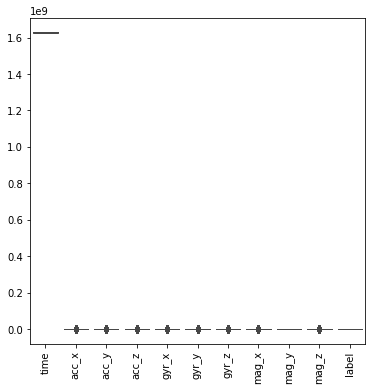

In [ ]:
#checking for outliers using boxplot
fig = plt.figure(figsize = (6,6))

#calling the boxplot
sns.boxplot(data = df, linewidth = 1) #linewidth -- space between each inforamation

plt.xticks(rotation = 'vertical')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5512ca9f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5512cb0c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5512ca9cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512cb5790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5512cb5cd0>],
 'means': []}

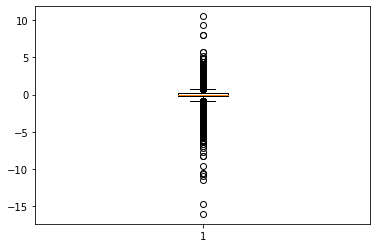

In [ ]:
#checking the outliers for acc_x using boxplot
plt.boxplot(df['acc_x'])

In [ ]:
#column names
df.columns

Index(['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z', 'label'],
      dtype='object')

In [6]:
#seperating the x and y variables
x = df.drop('label', axis = 1) #independent features
y = df['label'] #dependent features

In [7]:
#viewing the independent features
x.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5


In [8]:
#viewing the dependent features
y.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

**Checking for Outliers**

#a function to plot the outliers for the given column name - identify_outliers

In [9]:
#defining a variable named column_name n giving it all the column names except label
column_name = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z']

In [10]:
# Using a for loop inside a function to get the box plots(seaborn) of all the columns
def identify_outliers(give_df_name, give_column_name):
  for i in column_name:
    fig = plt.figure(figsize = (6,8))
    sns.boxplot(data = x, y = i)
plt.show()

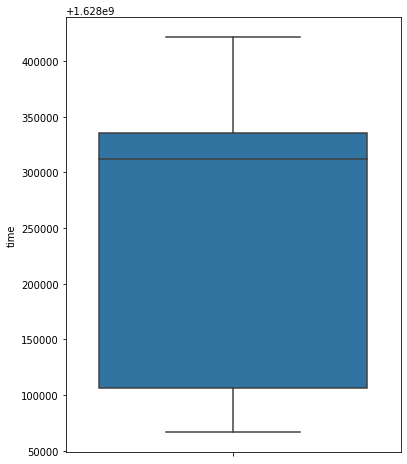

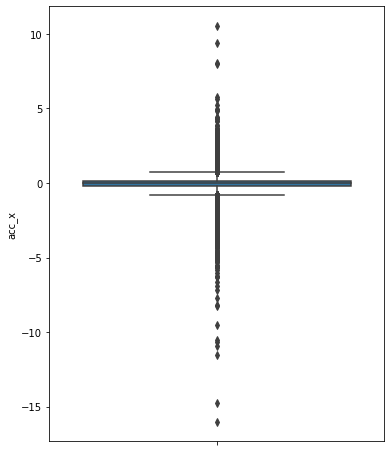

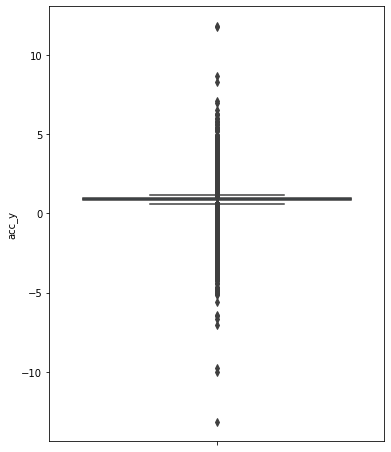

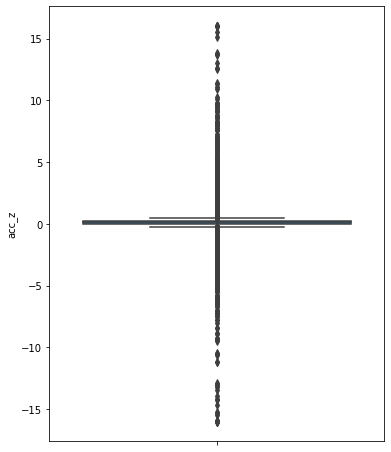

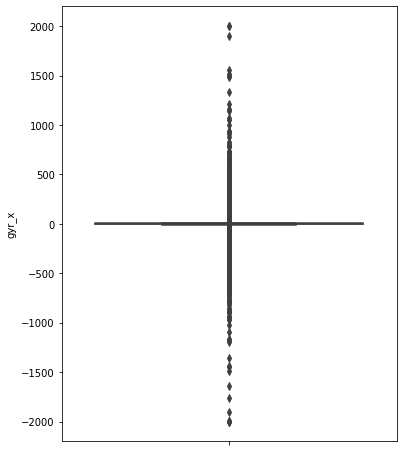

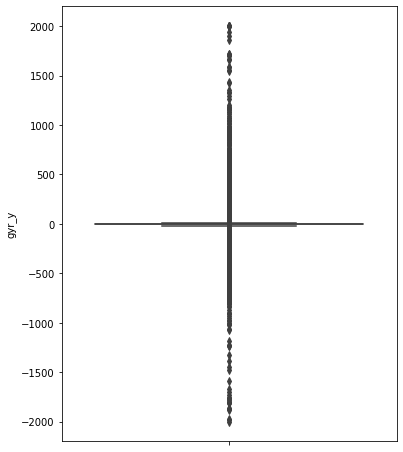

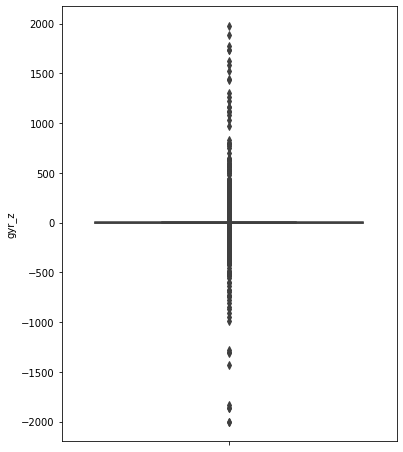

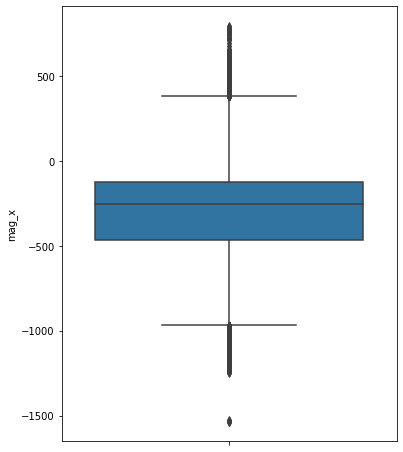

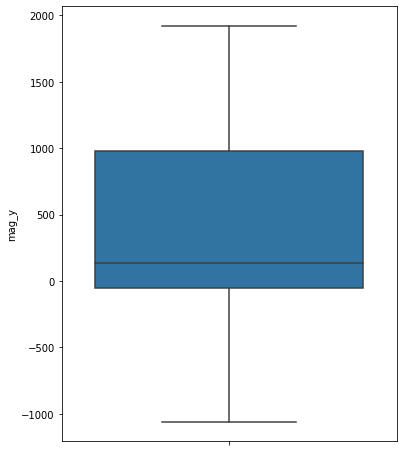

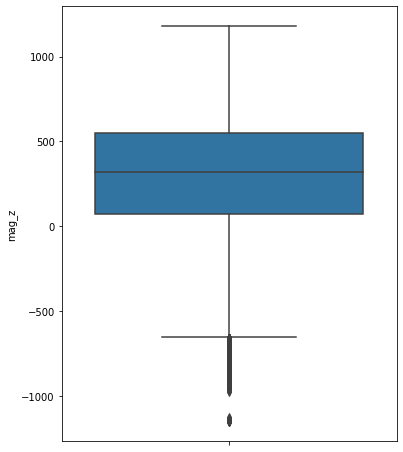

In [11]:
#Calling the above defined function to view the outliers for each and every column
identify_outliers(x, column_name)

**Replacing these outliers with median**

#creating function to replace outlier values with the median value - replace_outlier
#IQR

In [12]:
def replace_outlier(x, column_name):
    for i in column_name:
        print('column name : ',i)
        Q1 = np.percentile(x[i], 25)
        Q2 = np.percentile(x[i], 50)
        Q3 = np.percentile(x[i], 75)
        IQR = Q3 - Q1
        print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        x.loc[x[i] > upper_val, i] = np.median(x[i])
        x.loc[x[i] < lower_val, i] = np.median(x[i])
        
        fig = plt.figure(figsize = (6,8))
        sns.boxplot(data = x,y = i)
        plt.xticks(rotation = 'horizontal')
        plt.show()

column name :  time
Q1 = 1628105948.0 Q2 =  1628312235.0 Q3 =  1628335043.0
upper 1628678685.5
lower 1627762305.5


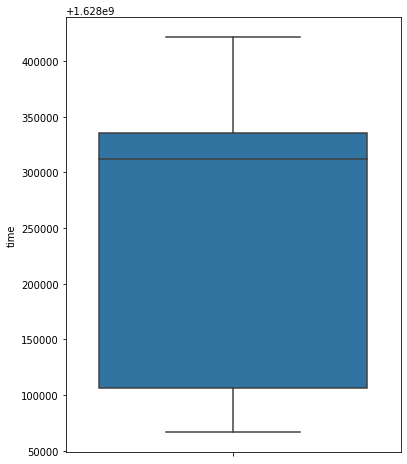

column name :  acc_x
Q1 = -0.2182617000000001 Q2 =  -0.0249023 Q3 =  0.1616211
upper 0.7314453000000001
lower -0.7880859000000002


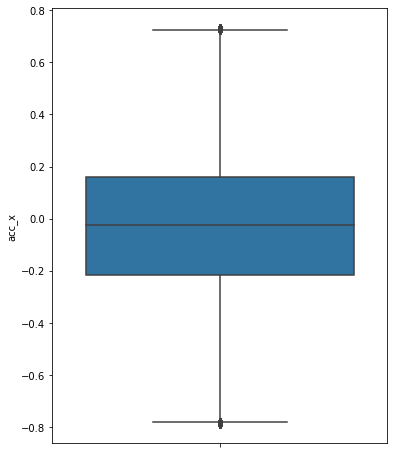

column name :  acc_y
Q1 = 0.828125 Q2 =  0.9370118 Q3 =  0.9736329
upper 1.1918947500000001
lower 0.60986315


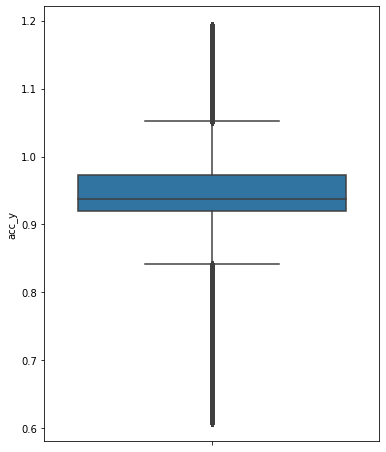

column name :  acc_z
Q1 = 0.0317383 Q2 =  0.1230469 Q3 =  0.2006836
upper 0.45410154999999996
lower -0.22167965


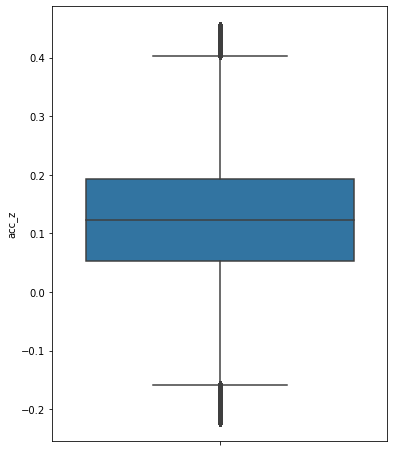

column name :  gyr_x
Q1 = -2.0141601 Q2 =  0.8544921999999998 Q3 =  3.7231445
upper 12.329101399999999
lower -10.620116999999999


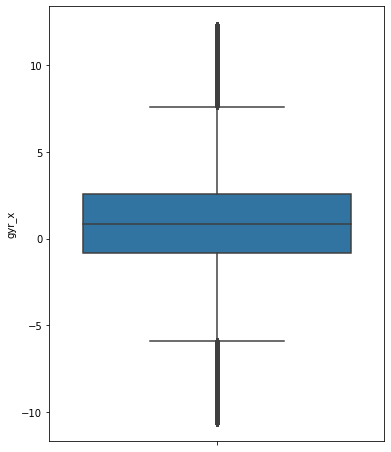

column name :  gyr_y
Q1 = -5.6762695 Q2 =  -1.8920898 Q3 =  1.8920898
upper 13.24462875
lower -17.02880845


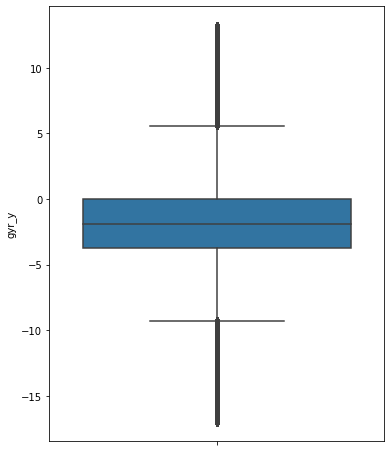

column name :  gyr_z
Q1 = -2.6855469 Q2 =  -0.6103516 Q3 =  1.4648437
upper 7.6904296
lower -8.911132799999999


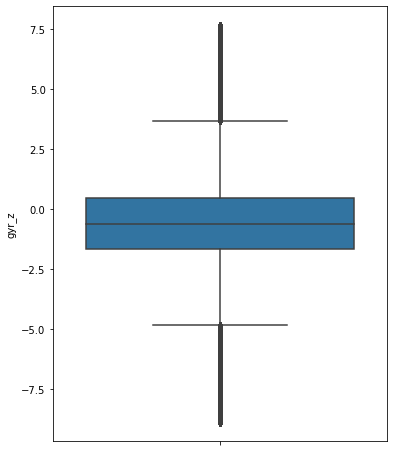

column name :  mag_x
Q1 = -463.5 Q2 =  -253.5 Q3 =  -126.0
upper 380.25
lower -969.75


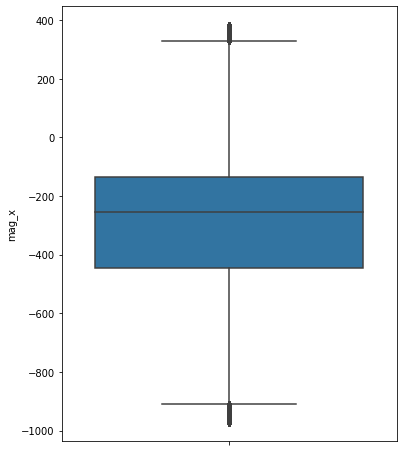

column name :  mag_y
Q1 = -49.5 Q2 =  139.5 Q3 =  979.5
upper 2523.0
lower -1593.0


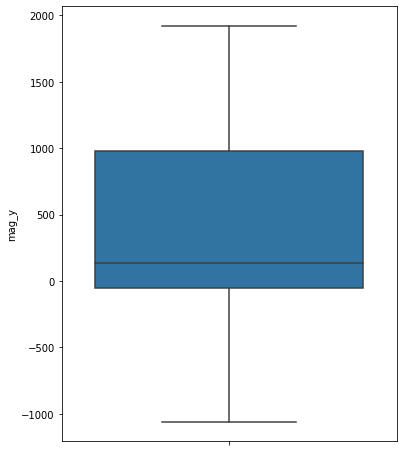

column name :  mag_z
Q1 = 69.0 Q2 =  316.5 Q3 =  552.0
upper 1276.5
lower -655.5


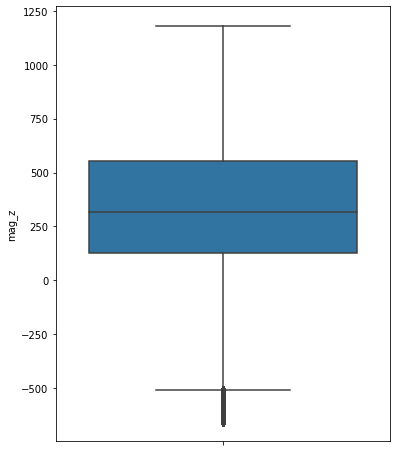

In [13]:
#Calling the above defined function to replace the outliers with median values for each and every column
replace_outlier(x, column_name)

### looking for outliers after imputing with median

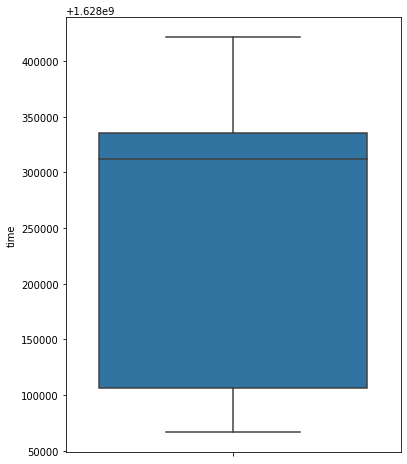

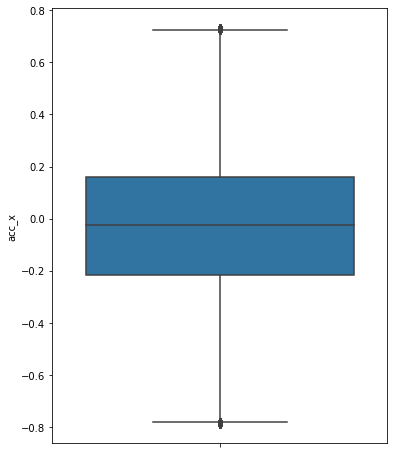

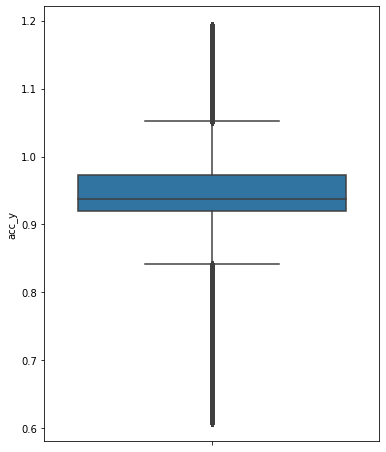

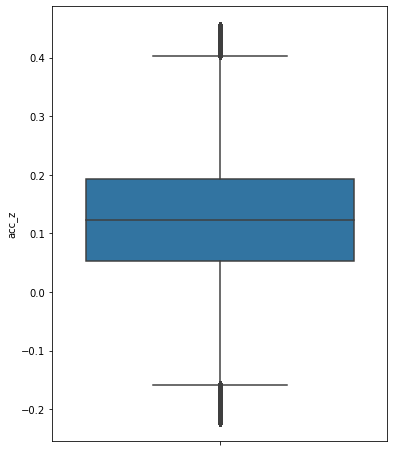

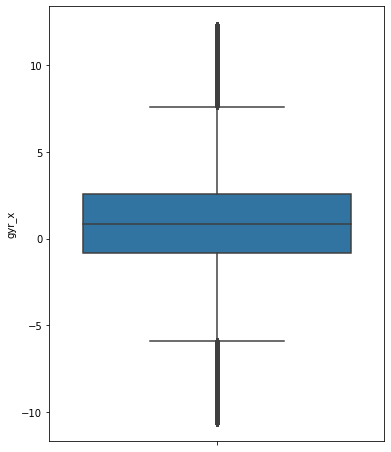

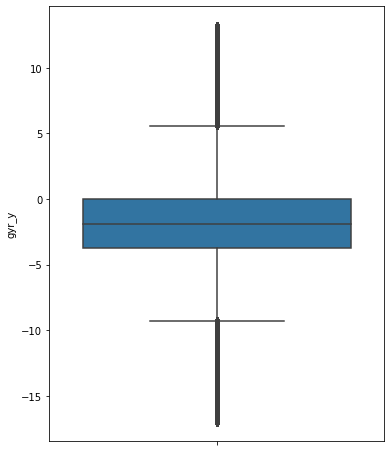

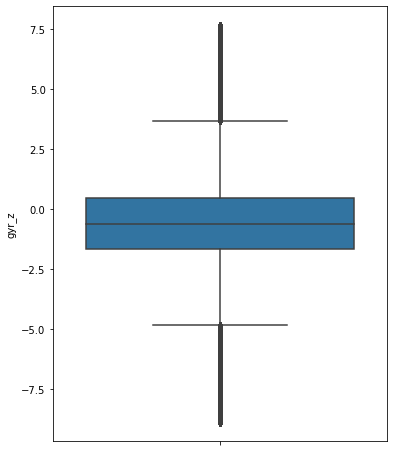

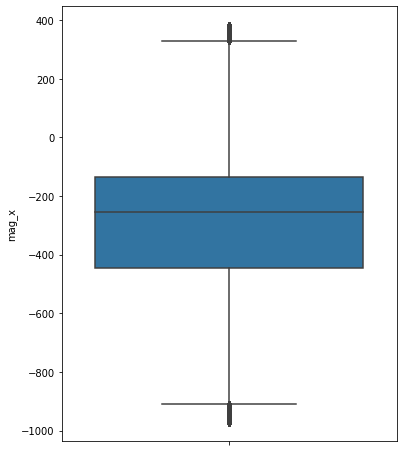

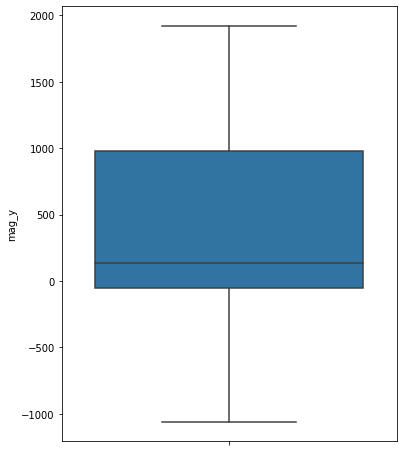

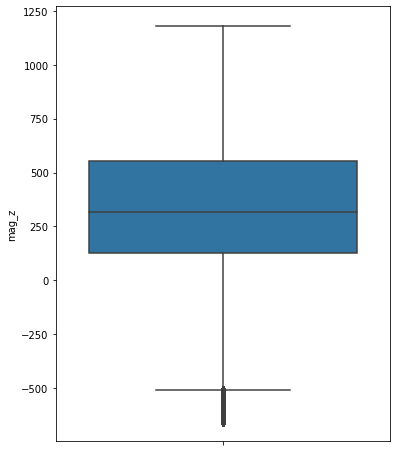

In [ ]:
identify_outliers(x, column_name)

## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(x)
x_normalized = pd.DataFrame(scaling.fit_transform(x))
x_normalized.head()

,0,1,2,3,4,5,6,7,8,9
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.5,0.500000,0.328142,0.838206,0.636958
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.5,0.500000,0.327030,0.833669,0.627146
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.5,0.500000,0.340378,0.832157,0.621423
3,0.037256,0.618451,0.603188,0.633864,0.500000,0.5,0.837037,0.325918,0.835181,0.627964
4,0.037256,0.631308,0.469799,0.693922,0.459893,0.5,0.374074,0.328142,0.832661,0.632870


In [15]:
#Replacing the numbers with column/variable names
x_normalized = pd.DataFrame(scaling.fit_transform(x),columns = x.columns)
x_normalized.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.5,0.500000,0.328142,0.838206,0.636958
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.5,0.500000,0.327030,0.833669,0.627146
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.5,0.500000,0.340378,0.832157,0.621423
3,0.037256,0.618451,0.603188,0.633864,0.500000,0.5,0.837037,0.325918,0.835181,0.627964
4,0.037256,0.631308,0.469799,0.693922,0.459893,0.5,0.374074,0.328142,0.832661,0.632870


#Feature Importance and Feature Selection

In [16]:
#select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features        k_score
0     time  551696.295023
1    acc_x  150058.553644
7    mag_x  106664.110660
8    mag_y   67694.199460
3    acc_z   43636.740653
2    acc_y   36914.462179
9    mag_z   20446.731776
5    gyr_y     207.009252
4    gyr_x     178.684434
6    gyr_z      34.429657


**One more method for finding important features**

In [ ]:
#from sklearn.feature_selection import mutual_info_classif
#mutual_info = mutual_info_classif(x_normalized, y)

#mutual_data = pd.Series(mutual_info, index = x.columns)
#mutual_data.sort_values(ascending = False)

#print(mutual_data.nlargest(9))

#mutual_data.nlargest(9).plot(kind = 'barh')
#plt.show()

In [18]:
x_selected_features = x_normalized[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']]
x_selected_features.iloc[450,:]

time     0.037281
acc_x    0.735455
mag_x    0.307008
mag_y    0.810988
acc_z    0.721418
acc_y    0.541107
Name: 450, dtype: float64

In [19]:
#Creating a new data frame from the normalized x values and appending the y values
new_df = x_normalized
new_df['label'] = y.values
new_df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,0.037256,0.395371,0.792785,0.803907,0.810160,0.5,0.500000,0.328142,0.838206,0.636958,2
1,0.037256,0.428158,0.840604,0.764834,0.475936,0.5,0.500000,0.327030,0.833669,0.627146,2
2,0.037256,0.537126,0.762584,0.647612,0.058824,0.5,0.500000,0.340378,0.832157,0.621423,2
3,0.037256,0.618451,0.603188,0.633864,0.500000,0.5,0.837037,0.325918,0.835181,0.627964,2
4,0.037256,0.631308,0.469799,0.693922,0.459893,0.5,0.374074,0.328142,0.832661,0.632870,2


In [ ]:
new_df['label'].value_counts()

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

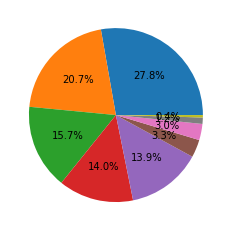

In [ ]:
#Distribution of target variable 'label' using pie chart
plt.pie(new_df['label'].value_counts(), autopct = '%1.1f%%');

##Applying Logistic regression on new_df

In [ ]:
#Seperating new_df into independent(x1) and dependent(y1) variables
#x1 = new_df.drop('label', axis = 1)   #Independent features
#y1 = new_df[['label']]     #Dependent feature

In [ ]:
#Splitting the data into train and test
#from sklearn.model_selection import train_test_split
#x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=20)

In [ ]:
#x1_train.shape

(9197643, 10)

In [ ]:
#Model building and training on train data
#from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression()
#log_reg.fit(x1_train,y1_train)

Model is not fitting on the entire huge dataset.
Hence we take certain samples of data and try to build model on these samples

In [20]:
import random
df1 = new_df.sample(30000)
df2 = new_df.sample(40000)

In [21]:
df1['label'].value_counts()

1    8351
4    6273
7    4773
6    4203
5    4074
9     979
8     868
3     356
2     123
Name: label, dtype: int64

In [22]:
df2['label'].value_counts()

1    11168
4     8261
7     6241
5     5733
6     5410
9     1384
8     1169
3      441
2      193
Name: label, dtype: int64

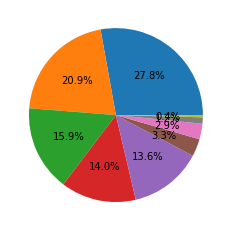

In [23]:
#distribution of target variable 'label' in sample df1
plt.pie(df1['label'].value_counts(), autopct = '%1.1f%%');

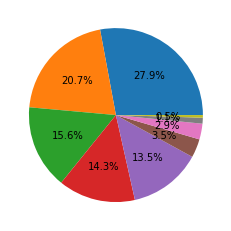

In [24]:
#distribution of target variable 'label' in sample df2
plt.pie(df2['label'].value_counts(), autopct = '%1.1f%%');

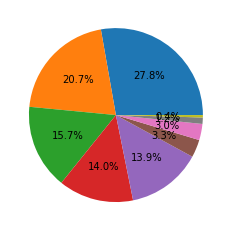

In [25]:
#distribution of target variable 'label' in entire population
plt.pie(new_df['label'].value_counts(), autopct = '%1.1f%%');

#Bulding the logistic regression model on df1

In [26]:
#Seperating df1 into independent(x1) and dependent(y1) variables
x1 = df1.drop('label', axis = 1)   #Independent features
y1 = df1[['label']]    #Dependent feature

In [27]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=20)
x1_train.shape

(22500, 10)

In [28]:
#Model building and training on train data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x1_train,y1_train)

LogisticRegression()

In [29]:
#Model prediction on test data
y1_pred = log_reg.predict(x1_test)
y1_pred

array([1, 1, 7, ..., 9, 4, 4])

In [32]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y1_test,y1_pred)
print('Accuracy: ',accuracy,'\n')
print('Confusion_Matrix: ',confusion_matrix(y1_test,y1_pred),'\n')
print('Classification_Report: ', classification_report(y1_test,y1_pred))


Accuracy:  0.4261333333333333 

Confusion_Matrix:  [[1159    0    0  560   90   90  106    0   50]
 [  14    0    0    3    2    1    5    0    0]
 [  54    0    0    8   14    7   14    0    2]
 [ 533    0    0  863   52   25   76    0   15]
 [ 181    0    0  137  436    0  249    0   10]
 [ 488    0    0  403   14  135   43    0    1]
 [ 256    0    0  171  225    8  525    0    4]
 [  81    0    0   97   17    3    9    0    4]
 [ 143    0    0   15   16    1    7    0   78]] 

Classification_Report:                precision    recall  f1-score   support

           1       0.40      0.56      0.47      2055
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        99
           4       0.38      0.55      0.45      1564
           5       0.50      0.43      0.46      1013
           6       0.50      0.12      0.20      1084
           7       0.51      0.44      0.47      1189
           8       0.00      0.00      0.00       211
   

#Applying Decision Tree on df2

In [33]:
df2['label'].value_counts()

1    11168
4     8261
7     6241
5     5733
6     5410
9     1384
8     1169
3      441
2      193
Name: label, dtype: int64

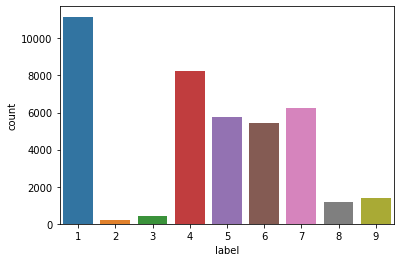

In [34]:
#Distribution of target variable 'label' on df2
sns.countplot(df2['label'])

As we can see, there is lot of imbalance in the target class , so we can balance it by using oversampling technique "SMOTE"

In [35]:
#Splitting the data into x2 and y2(independent & dependent features)
x2 = df2.drop('label', axis = 1)
y2 = df2[['label']]

###Decision Trees

In [36]:
#Spitting into train and test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 25)

In [37]:
type(y2_train)

pandas.core.frame.DataFrame

In [38]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x2_train, y2_train = oversample.fit_resample(x2_train, y2_train)
print('Classes and number of values in trainset after SMOTE:',y2_train.value_counts(),'\n')

Classes and number of values in trainset after SMOTE: label
1        7809
2        7809
3        7809
4        7809
5        7809
6        7809
7        7809
8        7809
9        7809
dtype: int64 



In [39]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 1000, max_depth = 5)

In [40]:
#Training the model
dt_model.fit(x2_train,y2_train)

DecisionTreeClassifier(max_depth=5, random_state=1000)

In [41]:
#Predictions on test data
y2_pred = dt_model.predict(x2_test)
print('Model.predict : ',y2_pred)

Model.predict :  [4 4 9 ... 1 4 5]


In [42]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y2_test,y2_pred)
print('Accuracy: ',accuracy)
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

Accuracy:  0.5383333333333333
[[1739  153   31  795   90  206  172   67  106]
 [   7   29   10    0    3    0    2    0    1]
 [  17   22   58    2   15   13    0    1    2]
 [ 249   10    0 1557   16  227  227  188   15]
 [ 131    0    1  289  685   80  488   22   39]
 [  73    8    0  508   17  908   55   47   31]
 [ 112   12    0  235  349   45 1063   10   15]
 [  28   16    5   88    5   27   52  115    4]
 [  37    2    0   23    5   10   24    0  306]]
              precision    recall  f1-score   support

           1       0.73      0.52      0.60      3359
           2       0.12      0.56      0.19        52
           3       0.55      0.45      0.49       130
           4       0.45      0.63      0.52      2489
           5       0.58      0.39      0.47      1735
           6       0.60      0.55      0.57      1647
           7       0.51      0.58      0.54      1841
           8       0.26      0.34      0.29       340
           9       0.59      0.75      0.66       

#Let us Apply random forest on sample df3

In [43]:
df3 = new_df.sample(50000)

In [44]:
df3['label'].value_counts()

1    13854
4    10464
7     7816
5     6937
6     6907
9     1675
8     1505
3      587
2      255
Name: label, dtype: int64

In [45]:
#Splitting the data into x3 and y3(independent & dependent features)
x3 = df3.drop('label', axis = 1)
y3 = df3[['label']]

In [46]:
#Spitting into train and test
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.30, random_state = 30)


In [47]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train, y3_train = oversample.fit_resample(x3_train, y3_train)
print('Classes and number of values in trainset after SMOTE:',y3_train.value_counts(),'\n')

Classes and number of values in trainset after SMOTE: label
1        9690
2        9690
3        9690
4        9690
5        9690
6        9690
7        9690
8        9690
9        9690
dtype: int64 



In [48]:
#Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=500)

In [49]:
#Training the model
rf_model.fit(x3_train,y3_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=500)

In [50]:
#Predictions on test data
y3_pred = rf_model.predict(x3_test)
print('Model.predict : ',y3_pred)

Model.predict :  [7 4 1 ... 4 4 6]


In [52]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y3_test,y3_pred)
print('Accuracy: ',accuracy,'\n')
print(confusion_matrix(y3_test,y3_pred),'\n')
print(classification_report(y3_test,y3_pred))

Accuracy:  0.9084 

[[3852    2   17  178   12   34    6   63    0]
 [   0   61   12    2    1    0    0    2    0]
 [   6    7  131    7    2    4    0    5    0]
 [ 188    1   10 2729   19   79    6  111    0]
 [   9    0   17   29 1991    9   25    2    7]
 [  49    1   15  137   12 1805    3   46    1]
 [   6    0    4   18   47    6 2239    5    3]
 [  34    0   12   52    0   25    3  311    0]
 [   4    0    2    1   13    1    2    0  507]] 

              precision    recall  f1-score   support

           1       0.93      0.93      0.93      4164
           2       0.85      0.78      0.81        78
           3       0.60      0.81      0.69       162
           4       0.87      0.87      0.87      3143
           5       0.95      0.95      0.95      2089
           6       0.92      0.87      0.90      2069
           7       0.98      0.96      0.97      2328
           8       0.57      0.71      0.63       437
           9       0.98      0.96      0.97       530

   

#Let us Apply SVC on sample df4 without taking SMOTE

In [53]:
df4 = new_df.sample(60000)

In [54]:
df4['label'].value_counts()

1    16632
4    12389
7     9507
5     8389
6     8376
9     1951
8     1760
3      727
2      269
Name: label, dtype: int64

In [55]:
#Splitting the data into x4 and y4(independent & dependent features)
x4 = df4.drop('label', axis = 1)
y4 = df4[['label']]

In [56]:
#Spitting into train and test
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.25, random_state = 50)

#Importing SVC
from sklearn.svm import SVC
svc_model = SVC()

#Training the model
svc_model.fit(x4_train,y4_train)

#Predictions on test data
y4_pred = svc_model.predict(x4_test)
print('Model.predict : ',y4_pred)

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y4_test,y4_pred)
print('Accuracy: ',accuracy)
print(confusion_matrix(y4_test,y4_pred))
print(classification_report(y4_test,y4_pred))

Model.predict :  [4 9 4 ... 7 1 1]
Accuracy:  0.737
[[3550    0    2  342   16  141   28    1    6]
 [  18    9   18    8    3    3    2    0    0]
 [  46    1   57   28   10   24   13    0    0]
 [ 661    0    0 2139   33  179   96    4    7]
 [  37    0    1   96 1574   29  343    1    4]
 [ 402    1    0  418   26 1228   23    0    1]
 [  30    0    0  143  178   10 2062    0    2]
 [ 183    0   11  148    5   60   26   18    3]
 [   9    0    0   20   32    4    8    1  418]]
              precision    recall  f1-score   support

           1       0.72      0.87      0.79      4086
           2       0.82      0.15      0.25        61
           3       0.64      0.32      0.43       179
           4       0.64      0.69      0.66      3119
           5       0.84      0.75      0.79      2085
           6       0.73      0.59      0.65      2099
           7       0.79      0.85      0.82      2425
           8       0.72      0.04      0.08       454
           9       0.95     

In [57]:
#Getting model parameters
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#GridSearchCV

In [65]:
param_grid = {'C':[0.1,1], 'gamma':[1,0.1], 'kernel':['rbf']}

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [67]:
#Fitting the grid to our training set
grid.fit(x4_train,y4_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time= 1.8min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.582 total time= 1.7min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time= 1.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time= 1.7min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time= 1.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.412 total time= 2.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.417 total time= 2.2min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.420 total time= 2.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.423 total time= 2.2min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.420 total time= 2.2min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.666 total time= 1.3min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [68]:
#Inspecting best parameters and best estimators found by GridsearchCV
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [70]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(x4_test)

In [72]:
accuracy = accuracy_score(y4_test,grid_predictions)
print('Accuracy: ',accuracy,'\n')
print(classification_report(y4_test,grid_predictions))

Accuracy:  0.6768 

              precision    recall  f1-score   support

           1       0.67      0.82      0.74      4086
           2       1.00      0.02      0.03        61
           3       0.60      0.16      0.26       179
           4       0.54      0.68      0.60      3119
           5       0.81      0.72      0.76      2085
           6       0.69      0.37      0.48      2099
           7       0.76      0.82      0.79      2425
           8       0.00      0.00      0.00       454
           9       0.93      0.83      0.88       492

    accuracy                           0.68     15000
   macro avg       0.67      0.49      0.50     15000
weighted avg       0.67      0.68      0.66     15000

